In [2]:
import numpy as np
import pandas as pd                     #Importing necessary libraries for the analysis
import matplotlib.pyplot as plt         # pandas for data handling 
import seaborn as sns                   #matplotlib and seaborn for visualization

plt.style.use('default')   #for better plot visuals

In [3]:
df=pd.read_csv('Movies_dataset.csv') #This is to load the data and assign it a variable

In [4]:
df                      

,id,original_title,original_language,genre,overview,popularity,vote_count,vote_average,release_date
0,278,The Shawshank Redemption,en,"Drama, Crime",Imprisoned in the 1940s for the double murder ...,36.1467,29384,8.714,1994-09-23
1,238,The Godfather,en,"Drama, Crime","Spanning the years 1945 to 1955, a chronicle o...",37.3341,22174,8.686,1972-03-14
2,240,The Godfather Part II,en,"Drama, Crime",In the continuing saga of the Corleone crime f...,14.6729,13404,8.571,1974-12-20
3,424,Schindler's List,en,"Drama, History, War",The true story of how businessman Oskar Schind...,13.6783,16923,8.566,1993-12-15
4,389,12 Angry Men,en,Drama,The defense and the prosecution have rested an...,10.6929,9589,8.548,1957-04-10
...,...,...,...,...,...,...,...,...,...
9995,226486,Tammy,en,Comedy,"For Tammy, a burger-joint employee, a bad day ...",2.7543,1257,5.336,2014-07-02
9996,47964,A Good Day to Die Hard,en,"Action, Thriller","Iconoclastic, take-no-prisoners cop John McCla...",4.2306,6606,5.335,2013-02-06
9997,203835,Amityville: The Awakening,en,Horror,"Belle, her little sister, and her comatose twi...",5.5595,1068,5.334,2017-06-30
9998,43552,Vanishing on 7th Street,en,"Mystery, Horror, Thriller",A mysterious global blackout yields countless ...,4.5139,601,5.334,2010-09-11


In [5]:
df.head()        # Helps to show first five rows

,id,original_title,original_language,genre,overview,popularity,vote_count,vote_average,release_date
0,278,The Shawshank Redemption,en,"Drama, Crime",Imprisoned in the 1940s for the double murder ...,36.1467,29384,8.714,1994-09-23
1,238,The Godfather,en,"Drama, Crime","Spanning the years 1945 to 1955, a chronicle o...",37.3341,22174,8.686,1972-03-14
2,240,The Godfather Part II,en,"Drama, Crime",In the continuing saga of the Corleone crime f...,14.6729,13404,8.571,1974-12-20
3,424,Schindler's List,en,"Drama, History, War",The true story of how businessman Oskar Schind...,13.6783,16923,8.566,1993-12-15
4,389,12 Angry Men,en,Drama,The defense and the prosecution have rested an...,10.6929,9589,8.548,1957-04-10


In [6]:
df.shape  #This shows total number of rows and columns present in the dataset

(10000, 9)

In [7]:
df.columns          

Index(['id', 'original_title', 'original_language', 'genre', 'overview',
       'popularity', 'vote_count', 'vote_average', 'release_date'],
      dtype='object')

In [8]:
df.info()         #Helps to find the Null values and datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   original_title     10000 non-null  object 
 2   original_language  10000 non-null  object 
 3   genre              9997 non-null   object 
 4   overview           9999 non-null   object 
 5   popularity         10000 non-null  float64
 6   vote_count         10000 non-null  int64  
 7   vote_average       10000 non-null  float64
 8   release_date       9998 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


In [9]:
df.describe()

,id,popularity,vote_count,vote_average
count,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,2.212515e+05,4.603044,2063.779600,6.714658
std,2.931349e+05,8.043705,3289.281439,0.672304
min,2.000000e+00,0.003300,300.000000,5.300000
25%,1.032150e+04,2.069625,473.000000,6.200000
50%,4.144250e+04,3.527850,863.000000,6.700000
75%,3.998520e+05,5.345425,2064.250000,7.200000
max,1.426776e+06,441.551500,38436.000000,8.714000


## Handling Datatype

#### As we can see above, the release_date column has a datatype 'object' which has to be changed to date. Also some missing(NULL) values which we will resolve later on.  

In [10]:
df['release_date'] = pd.to_datetime(  #This is to change the datatype of datetime column
    df['release_date'],
    errors='coerce'
)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 10000 non-null  int64         
 1   original_title     10000 non-null  object        
 2   original_language  10000 non-null  object        
 3   genre              9997 non-null   object        
 4   overview           9999 non-null   object        
 5   popularity         10000 non-null  float64       
 6   vote_count         10000 non-null  int64         
 7   vote_average       10000 non-null  float64       
 8   release_date       9998 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 703.3+ KB


In [12]:
df['release_date'].head(10)

0   1994-09-23
1   1972-03-14
2   1974-12-20
3   1993-12-15
4   1957-04-10
5   2001-07-20
6   2008-07-16
7   1995-10-20
8   1999-12-10
9   2019-05-30
Name: release_date, dtype: datetime64[ns]

In [13]:
df['release_date'].sample(5)

2269   1973-12-13
3955   1992-10-20
6464   2010-02-04
8798   1982-08-13
1214   2009-02-27
Name: release_date, dtype: datetime64[ns]

## Handling Missing Values

#### As we have seem there are some missing values in some columns of the dateset. First find out which column has missing value and how many of them are present

In [14]:
df.isnull().sum()     #to detect and count the no. of missng(null or NaN) values in each column

id                   0
original_title       0
original_language    0
genre                3
overview             1
popularity           0
vote_count           0
vote_average         0
release_date         2
dtype: int64

#### This clearly shows that columns(genre,overview and release_date) have some missing values.Let's resolve this. 
#### There are very few rows with missing values so instead of just dropping them we will use "fillna" to simply fill the missing vlaues.
#### We drop rows when there are more than 50% of data is missing 

In [15]:
df['genre']=df['genre'].fillna('Unknown')      

In [16]:
df['overview']=df['overview'].fillna('No overview available')

#### Here we directly going to drop the rows which has null values in release_date column, because release_date are critical of analysis, aslo rows without it are useless and misleading 

In [17]:
df = df.dropna(subset=['release_date'])

In [18]:
df.isnull().sum()  #All missing values are resolved

id                   0
original_title       0
original_language    0
genre                0
overview             0
popularity           0
vote_count           0
vote_average         0
release_date         0
dtype: int64

## Handling Duplicates

 #### Let's find out how many duplicates present in this datasets and fix them.

In [19]:
df[df.duplicated()].shape     # This shows the no. of duplicate rows present in the dataset

(3, 9)

In [20]:
df['id'].value_counts().head(10)   #here we count the duplicate "id" in the dataset

id
82695     2
842924    2
58857     2
319373    2
433808    2
129       1
155       1
19404     1
497       1
888       1
Name: count, dtype: int64

In [21]:
df[df['id'] == 842924] #This shows the rows with the duplicate ids

,id,original_title,original_language,genre,overview,popularity,vote_count,vote_average,release_date
1949,842924,The Life of Chuck,en,"Fantasy, Drama",In this extraordinary story of an ordinary man...,11.3833,620,7.334,2025-06-05
1966,842924,The Life of Chuck,en,"Fantasy, Drama",In this extraordinary story of an ordinary man...,11.3833,619,7.334,2025-06-05


In [22]:
df['id'].value_counts().head(10)     #After dropping the duplicates still there is two "id" with duplicate values

id
82695     2
842924    2
58857     2
319373    2
433808    2
129       1
155       1
19404     1
497       1
888       1
Name: count, dtype: int64

In [23]:
df.drop_duplicates(subset=['id'], keep='first', inplace=True)

C:\Users\lovku\AppData\Local\Temp\ipykernel_6720\2563726284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['id'], keep='first', inplace=True)


In [24]:
df[df.duplicated()].shape

(0, 9)

In [25]:
df.shape

(9993, 9)

In [26]:
df.isna().sum()
(df.isna().mean() * 100).round(2)

id                   0.0
original_title       0.0
original_language    0.0
genre                0.0
overview             0.0
popularity           0.0
vote_count           0.0
vote_average         0.0
release_date         0.0
dtype: float64

## Handling Outliers

#### First we going to find out if this data contain outliers or not.This we'll be doing by plotting boxplot with the help of matplotlib and seaborn

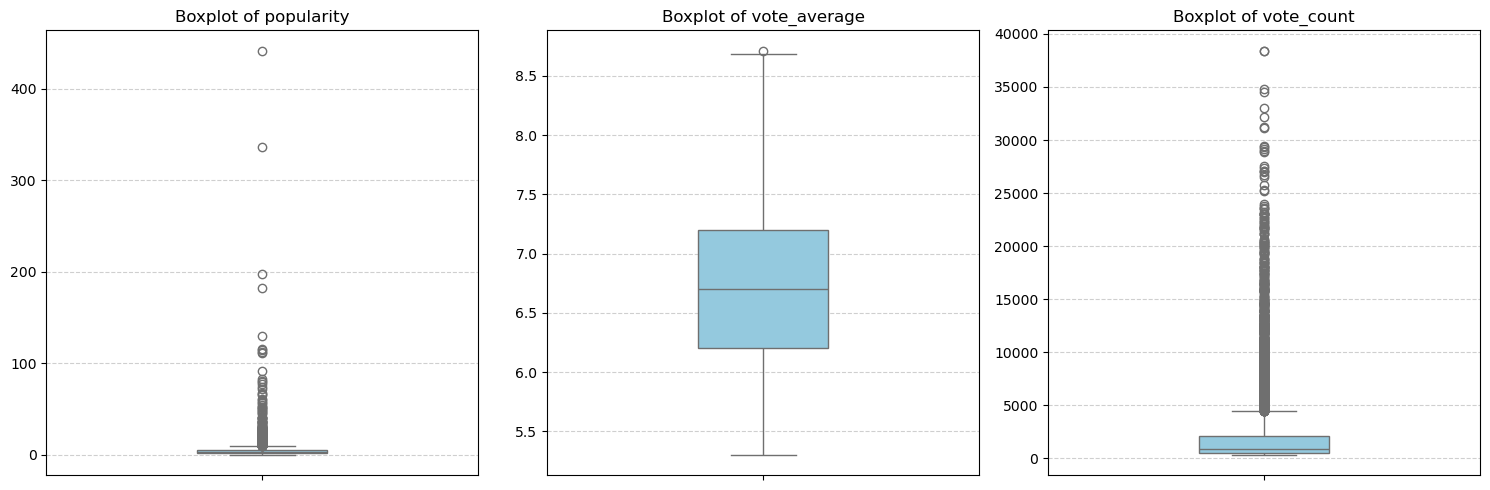

In [27]:
cols = ['popularity', 'vote_average', 'vote_count']

plt.figure(figsize=(15,5))

for i, col in enumerate(cols,1): 
    plt.subplot(1,3,i)
    sns.boxplot(y=df[col] ,color='skyblue',width=0.3)
    plt.title(f'Boxplot of {col}',fontsize=12)
    plt.ylabel('')
    plt.grid(axis='y',linestyle='--',alpha=0.6)

plt.tight_layout()    
plt.show()

In [28]:
from scipy import stats

In [29]:
stats.zscore(df[['popularity','vote_count']])      # This is to find the z-score.z-score>3 shows outlier in the data
                                                #And we can clearly see that outliers

array([[ 3.92061924,  8.30416519],
       [ 4.06820248,  6.11261779],
       [ 1.25161739,  3.44689369],
       ...,
       [ 0.11890304, -0.30274969],
       [-0.01105572, -0.44469874],
       [-0.05249437, -0.5304153 ]])

In [30]:
z_score=np.abs(stats.zscore(df[['popularity','vote_count']])) #here we change the negative number with the help of "abs"(absolute)
z_score                                                          

array([[3.92061924, 8.30416519],
       [4.06820248, 6.11261779],
       [1.25161739, 3.44689369],
       ...,
       [0.11890304, 0.30274969],
       [0.01105572, 0.44469874],
       [0.05249437, 0.5304153 ]])

In [31]:
df[(z_score>3).any(axis=1)]                     #This is to remove the outliers from the data

,id,original_title,original_language,genre,overview,popularity,vote_count,vote_average,release_date
0,278,The Shawshank Redemption,en,"Drama, Crime",Imprisoned in the 1940s for the double murder ...,36.1467,29384,8.714,1994-09-23
1,238,The Godfather,en,"Drama, Crime","Spanning the years 1945 to 1955, a chronicle o...",37.3341,22174,8.686,1972-03-14
2,240,The Godfather Part II,en,"Drama, Crime",In the continuing saga of the Corleone crime f...,14.6729,13404,8.571,1974-12-20
3,424,Schindler's List,en,"Drama, History, War",The true story of how businessman Oskar Schind...,13.6783,16923,8.566,1993-12-15
5,129,千と千尋の神隠し,ja,"Animation, Family, Fantasy","A young girl, Chihiro, becomes trapped in a st...",25.6839,17726,8.533,2001-07-20
...,...,...,...,...,...,...,...,...,...
8417,209112,Batman v Superman: Dawn of Justice,en,"Action, Adventure, Fantasy",Fearing the actions of a god-like Super Hero l...,15.8460,18637,5.988,2016-03-23
8462,7451,xXx,en,"Action, Adventure, Thriller, Crime, Drama",Xander Cage is your standard adrenaline junkie...,82.6721,4697,5.976,2002-08-09
8692,297761,Suicide Squad,en,"Action, Adventure, Fantasy","From DC Comics comes the Suicide Squad, an ant...",5.6023,21756,5.919,2016-08-03
8836,216015,Fifty Shades of Grey,en,"Drama, Romance, Thriller",When college senior Anastasia Steele steps in ...,18.9575,12192,5.877,2015-02-11


In [32]:
df_clean =df[~(z_score>3).any(axis=1)]    #store the data im a new variavle ("df_clean")

In [33]:
df_clean.shape                            #Total rows of clean data

(9696, 9)

In [34]:
df.shape                                  #Total number of rows in unclean data after removing null values and duplicates

(9993, 9)

In [35]:
z_score=np.abs(stats.zscore(df_clean[['popularity','vote_count']]))  #This is the z_score of clean data after removing the outliers
z_score 

array([[2.28793305, 3.96056592],
       [0.66870622, 1.43067569],
       [2.52598816, 3.81327608],
       ...,
       [0.52986642, 0.29386365],
       [0.17177345, 0.52703096],
       [0.05759193, 0.66783006]])

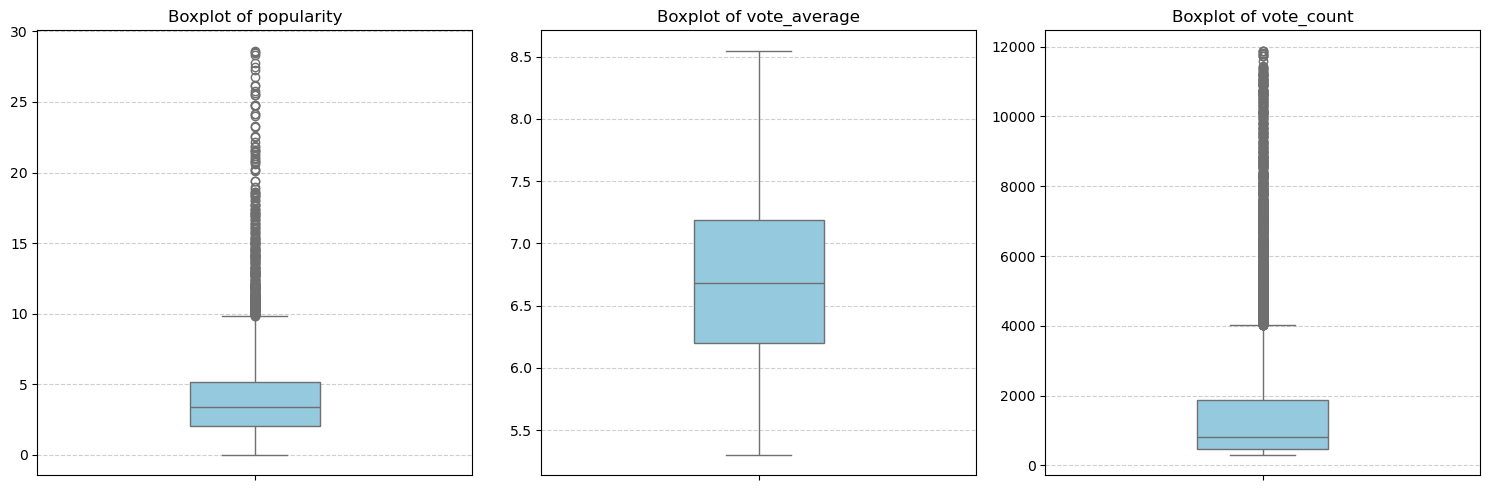

In [36]:
cols = ['popularity', 'vote_average', 'vote_count']             #ploting boxplot from the clean data
                                                                #we can't just remove the genuine data which can distort the information or insight 
plt.figure(figsize=(15,5))                                      #This is a fare data if you read the data thoroughly.

for i, col in enumerate(cols,1): 
    plt.subplot(1,3,i)
    sns.boxplot(y=df_clean[col] ,color='skyblue',width=0.3)
    plt.title(f'Boxplot of {col}',fontsize=12)
    plt.ylabel('')
    plt.grid(axis='y',linestyle='--',alpha=0.6)

plt.tight_layout()    
plt.show()

In [37]:
df_clean.describe()

,id,popularity,vote_count,vote_average,release_date
count,9.696000e+03,9696.000000,9696.000000,9696.000000,9696
mean,2.212220e+05,4.012337,1656.565903,6.689833,2004-11-28 17:47:49.306930688
min,2.000000e+00,0.003300,300.000000,5.300000,1902-06-15 00:00:00
25%,1.037975e+04,2.023400,466.000000,6.195000,1997-07-28 00:00:00
50%,4.077250e+04,3.430700,825.500000,6.681000,2010-02-10 00:00:00
75%,4.017352e+05,5.149025,1884.250000,7.187000,2017-09-29 00:00:00
max,1.426776e+06,28.640900,11888.000000,8.548000,2025-11-05 00:00:00
std,2.921729e+05,2.920063,2002.956989,0.658905,NaN


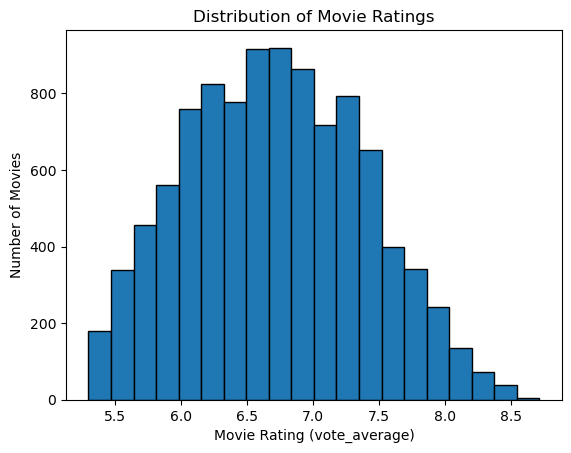

In [38]:
plt.hist(
    df['vote_average'],
    bins=20,
    edgecolor='black',   # bar border color
    linewidth=1          # thickness of border
)

plt.xlabel('Movie Rating (vote_average)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Ratings')
plt.show()

In [39]:
bins = [0, 5, 7, 10]                              #This is to create a column into the dataset named "movie_rating" which will help us for visualization
labels = ['Low', 'Average', 'High']
df_clean['movie_rating'] = pd.cut(
    df['vote_average'],
    bins=bins,
    labels=labels,
    include_lowest=True
)


C:\Users\lovku\AppData\Local\Temp\ipykernel_6720\4287116791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['movie_rating'] = pd.cut(


In [40]:
df_clean

,id,original_title,original_language,genre,overview,popularity,vote_count,vote_average,release_date,movie_rating
4,389,12 Angry Men,en,Drama,The defense and the prosecution have rested an...,10.6929,9589,8.548,1957-04-10,High
7,19404,दिलवाले दुल्हनिया ले जायेंगे,hi,"Comedy, Drama, Romance","Raj is a rich, carefree, happy-go-lucky second...",5.9649,4522,8.500,1995-10-20,High
13,429,"Il buono, il brutto, il cattivo",it,Western,While the Civil War rages on between the Union...,11.3880,9294,8.465,1966-12-22,High
17,346,七人の侍,ja,"Action, Drama",A samurai answers a village's request for prot...,6.4146,4052,8.400,1954-04-26,High
18,12477,火垂るの墓,ja,"Animation, Drama, War","In the final months of World War II, 14-year-o...",0.0082,6234,8.446,1988-04-16,High
...,...,...,...,...,...,...,...,...,...,...
9995,226486,Tammy,en,Comedy,"For Tammy, a burger-joint employee, a bad day ...",2.7543,1257,5.336,2014-07-02,Average
9996,47964,A Good Day to Die Hard,en,"Action, Thriller","Iconoclastic, take-no-prisoners cop John McCla...",4.2306,6606,5.335,2013-02-06,Average
9997,203835,Amityville: The Awakening,en,Horror,"Belle, her little sister, and her comatose twi...",5.5595,1068,5.334,2017-06-30,Average
9998,43552,Vanishing on 7th Street,en,"Mystery, Horror, Thriller",A mysterious global blackout yields countless ...,4.5139,601,5.334,2010-09-11,Average


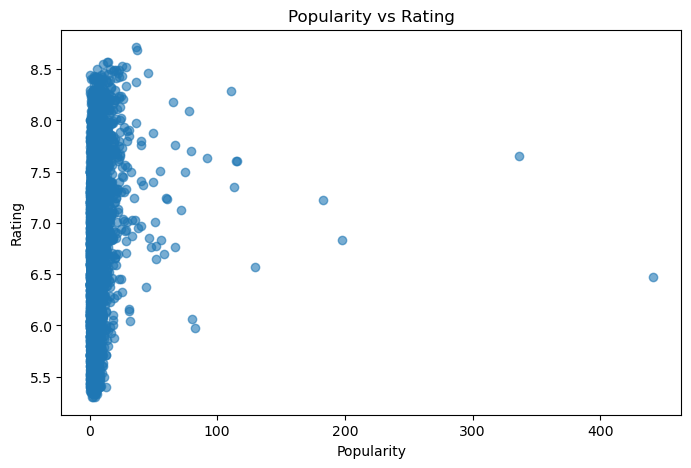

In [41]:
plt.figure(figsize=(8,5))
plt.scatter(df['popularity'], df['vote_average'], alpha=0.6)
plt.xlabel('Popularity')
plt.ylabel('Rating')
plt.title('Popularity vs Rating')
plt.show()


In [45]:
df_clean.to_csv("cleaned_data.csv", index=False)


In [46]:
pd.read_csv("cleaned_data.csv").head()


,id,original_title,original_language,genre,overview,popularity,vote_count,vote_average,release_date,movie_rating
0,389,12 Angry Men,en,Drama,The defense and the prosecution have rested an...,10.6929,9589,8.548,1957-04-10,High
1,19404,दिलवाले दुल्हनिया ले जायेंगे,hi,"Comedy, Drama, Romance","Raj is a rich, carefree, happy-go-lucky second...",5.9649,4522,8.500,1995-10-20,High
2,429,"Il buono, il brutto, il cattivo",it,Western,While the Civil War rages on between the Union...,11.3880,9294,8.465,1966-12-22,High
3,346,七人の侍,ja,"Action, Drama",A samurai answers a village's request for prot...,6.4146,4052,8.400,1954-04-26,High
4,12477,火垂るの墓,ja,"Animation, Drama, War","In the final months of World War II, 14-year-o...",0.0082,6234,8.446,1988-04-16,High


In [49]:
import pandas as pd

for col in df.select_dtypes(include="object"):
    df[col] = (
        df[col]
        .astype(str)
        .str.encode("utf-8", errors="ignore")
        .str.decode("utf-8")
    )


C:\Users\lovku\AppData\Local\Temp\ipykernel_6720\1339972430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (
C:\Users\lovku\AppData\Local\Temp\ipykernel_6720\1339972430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (
C:\Users\lovku\AppData\Local\Temp\ipykernel_6720\1339972430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [52]:
for col in df.select_dtypes(include="object"):
    try:
        df[col].str.encode("cp1252")
    except Exception as e:
        print(f"Issue in column: {col}")


Issue in column: original_title
Issue in column: overview


In [53]:
bad_cols = ['original_title', 'overview']

for col in bad_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.encode('utf-8', errors='ignore')
        .str.decode('utf-8')
    )


C:\Users\lovku\AppData\Local\Temp\ipykernel_6720\3424585736.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (
C:\Users\lovku\AppData\Local\Temp\ipykernel_6720\3424585736.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (


In [54]:
df.to_csv(
    "cleaned_data_mysql.csv",
    index=False,
    encoding="utf-8"
)

In [55]:
bad_cols = ['original_title', 'overview']

for col in bad_cols:
    df[col] = df[col].str.replace(
        r'[^\x00-\x7F]+',
        '',
        regex=True
    )


C:\Users\lovku\AppData\Local\Temp\ipykernel_6720\204654793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace(


In [56]:
df.to_csv("cleaned_data_mysql1.csv", index=False, encoding="utf-8")
